# Clustering methods

## Scikit-learn, SciPy and RAPIDS cuML backends

Clustergram offers three backends for the computation - `scikit-learn` and `scipy` which use CPU and RAPIDS.AI `cuML`, which uses GPU. Note that all are optional dependencies but you will need at least one of them to generate clustergram.

Let's load the data on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [6]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

seaborn.set(style='whitegrid')

Using `scikit-learn` (default):

In [4]:
cgram = Clustergram(range(1, 8), backend="sklearn")
cgram.fit(data)

K=1 fitted in 0.03873419761657715 seconds.
K=2 fitted in 0.019382953643798828 seconds.
K=3 fitted in 0.029963016510009766 seconds.
K=4 fitted in 0.03318214416503906 seconds.
K=5 fitted in 0.028235912322998047 seconds.
K=6 fitted in 0.03303194046020508 seconds.
K=7 fitted in 0.03239035606384277 seconds.


Using `cuML`:

In [3]:
cgram = Clustergram(range(1, 8), backend='cuML')
cgram.fit(data)

ImportError: cuML, cuDF and cupy packages are required to use `cuML` backend.

`data` can be all data types supported by the selected backend (including `cudf.DataFrame` or `cupy.ndarray` with `cuML` backend).

## Supported methods

Clustergram currently supports K-Means, Mini Batch K-Means, Gaussian Mixture Model and SciPy's hierarchical clustering methods. Note tha GMM and Mini Batch K-Means are supported only for `scikit-learn` backend and hierarchical methods are supported only for `scipy` backend.

Using K-Means (default):

K=1 fitted in 0.037338972091674805 seconds.
K=2 fitted in 0.01883101463317871 seconds.
K=3 fitted in 0.03318500518798828 seconds.
K=4 fitted in 0.038063764572143555 seconds.
K=5 fitted in 0.031418800354003906 seconds.
K=6 fitted in 0.03259706497192383 seconds.
K=7 fitted in 0.03434491157531738 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

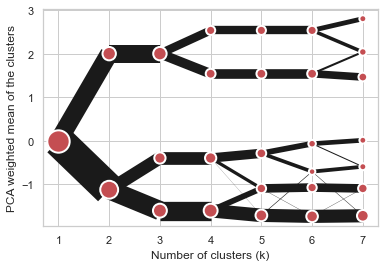

In [7]:
cgram = Clustergram(range(1, 8), method='kmeans')
cgram.fit(data)
cgram.plot()

Using Mini Batch K-Means, which can provide significant speedup over K-Means:

K=1 fitted in 0.013917922973632812 seconds.
K=2 fitted in 0.011487007141113281 seconds.
K=3 fitted in 0.01315617561340332 seconds.
K=4 fitted in 0.013792037963867188 seconds.
K=5 fitted in 0.01885986328125 seconds.
K=6 fitted in 0.019958019256591797 seconds.
K=7 fitted in 0.01650094985961914 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

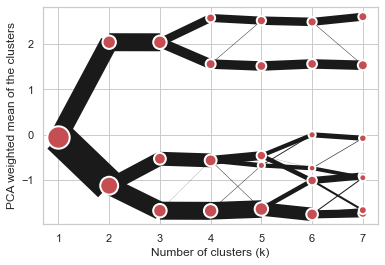

In [8]:
cgram = Clustergram(range(1, 8), method='minibatchkmeans', batch_size=100)
cgram.fit(data)
cgram.plot()

Using Gaussian Mixture Model:


K=1 fitted in 0.009224891662597656 seconds.
K=2 fitted in 0.00626683235168457 seconds.
K=3 fitted in 0.012464761734008789 seconds.
K=4 fitted in 0.008269071578979492 seconds.
K=5 fitted in 0.009671926498413086 seconds.
K=6 fitted in 0.015596151351928711 seconds.
K=7 fitted in 0.02029728889465332 seconds.


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

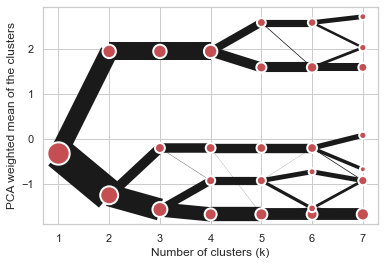

In [9]:
cgram = Clustergram(range(1, 8), method='gmm')
cgram.fit(data)
cgram.plot()

Using Ward's hierarchical clustering:

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

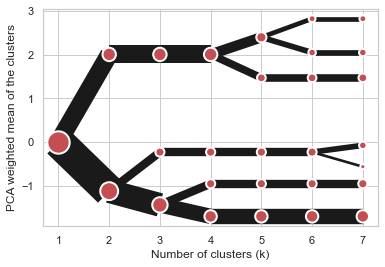

In [10]:
cgram = Clustergram(range(1, 8), method='hierarchical', linkage='ward')
cgram.fit(data)
cgram.plot()

## Manual input

Alternatively, you can create clustergram using `from_data` or  `from_centers` methods based on alternative clustering algorithms.

Using `Clustergram.from_data` which creates cluster centers as mean or median values:

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

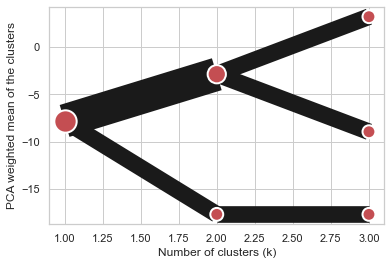

In [11]:
import numpy
import pandas

data = numpy.array([[-1, -1, 0, 10], [1, 1, 10, 2], [0, 0, 20, 4]])
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})

cgram = Clustergram.from_data(data, labels)
cgram.plot()

Using `Clustergram.from_centers` based on explicit cluster centers.:

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

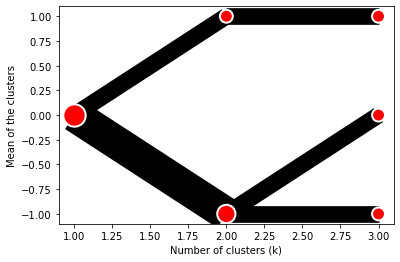

In [29]:
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})
centers = {
            1: numpy.array([[0, 0, 0]]),
            2: numpy.array([[-1, -1, -1], [1, 1, 1]]),
            3: numpy.array([[-1, -1, -1], [1, 1, 1], [0, 0, 0]]),
        }
cgram = Clustergram.from_centers(centers, labels)
cgram.plot(pca_weighted=False)

To support PCA weighted plots with clustergram created from centers you also need to pass data:

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

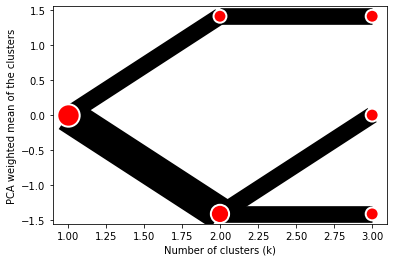

In [33]:
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})
centers = {
    1: numpy.array([[0, 0]]),
    2: numpy.array([[-1, -1], [1, 1]]),
    3: numpy.array([[-1, -1], [1, 1], [0, 0]]),
}
data = numpy.array([[-1, -1], [1, 1], [0, 0]])
cgram = Clustergram.from_centers(centers, labels, data=data)
cgram.plot(pca_weighted=True)